In [15]:
!pip install sentence-transformers

##SBERT model bert-base-nli-mean-tokens

In [16]:
# Load a BERT-based model trained for sentence similarity tasks

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [17]:
sentences = [
    "the fifty mannequin heads floating in the pool kind of freaked them out",
    "she swore she just saw her sushi move",
    "he embraced his new life as an eggplant",
    "my dentist tells me that chewing bricks is very bad for your teeth",
    "the dental specialist recommended an immediate stop to flossing with construction materials"
]

In [18]:
embeddings = model.encode(sentences)  # Encode the sentences into vector embeddings

embeddings

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


array([[-0.18893532,  0.18380444, -0.5132151 , ..., -0.962286  ,
         0.16144845, -0.18547605],
       [-0.02548049, -0.06504361,  0.8549072 , ..., -0.08297283,
        -0.26982743, -0.09522355],
       [-0.05365522, -0.1009284 ,  0.9991932 , ...,  1.1357745 ,
         0.01794554, -0.24008048],
       [ 0.21320136,  1.8518627 ,  0.36619216, ...,  0.00735286,
         0.31327718,  0.41728267],
       [ 0.17712377,  1.5110043 ,  0.962754  , ...,  0.0707163 ,
        -0.27150482,  0.34254563]], dtype=float32)

In [19]:
embeddings.shape

(5, 768)

In [20]:
import numpy as np
from sentence_transformers.util import cos_sim

sim = np.zeros((len(sentences), len(sentences)))   # Create an empty similarity matrix

for i in range(len(sentences)):                      # Compute cosine similarity between each sentence and the others (lower triangle only)
    sim[i:,i] = cos_sim(embeddings[i], embeddings[i:])

sim

/tmp/ipython-input-361184377.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  sim[i:,i] = cos_sim(embeddings[i], embeddings[i:])


array([[0.99999988, 0.        , 0.        , 0.        , 0.        ],
       [0.40914318, 0.99999988, 0.        , 0.        , 0.        ],
       [0.1090903 , 0.44547981, 1.        , 0.        , 0.        ],
       [0.50074863, 0.30693954, 0.20791674, 1.        , 0.        ],
       [0.29936209, 0.38607216, 0.28499278, 0.63849491, 0.99999994]])

<Axes: >

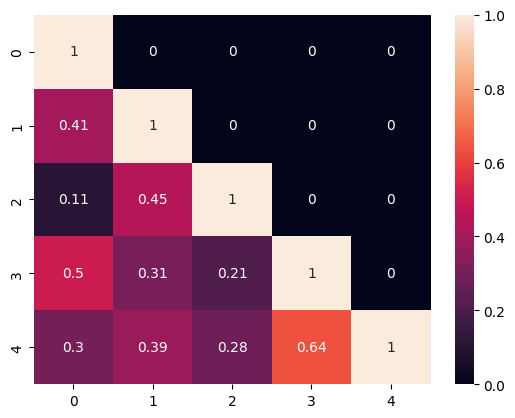

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sim,annot=True)   # Visualize the similarity matrix using a heatmap

##SentenceTransformer model for all-mpnet-base-v2

In [22]:
mpnet = SentenceTransformer('all-mpnet-base-v2')  # more modern and powerful model

mpnet

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [23]:
embeddings = mpnet.encode(sentences)   #Encode sentences using MPNet

sim = np.zeros((len(sentences), len(sentences)))  # Create a new similarity matrix

for i in range(len(sentences)):            # Compute cosine similarity
    sim[i:,i] = cos_sim(embeddings[i], embeddings[i:])

sim

/tmp/ipython-input-1227082230.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  sim[i:,i] = cos_sim(embeddings[i], embeddings[i:])


array([[ 1.00000012,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.26406276,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.16503504,  0.16126688,  1.00000012,  0.        ,  0.        ],
       [ 0.04334458,  0.04615868,  0.0567013 ,  1.        ,  0.        ],
       [ 0.053985  ,  0.06101184, -0.01122262,  0.51847214,  1.00000012]])

<Axes: >

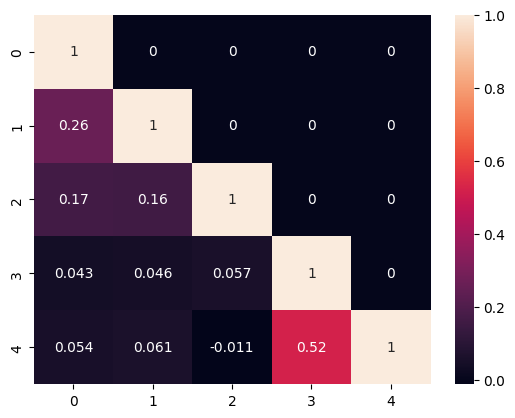

In [24]:
sns.heatmap(sim,annot=True)  # Visualize the similarity matrix using a heatmap